### Name:Zhan Wang     
### Student ID:519432910019

### Proposition:There is a two-coloring-edges K_n with at most $\left( \begin{array}{c}n\\4\\\end{array} \right) \cdot 2^{-5}$ monochromatic $K_4$.

**proof1**:Indeed, $\left(\begin{array}{l}n \\ 4\end{array}\right) \cdot 2^{-5}$ is the expected number of monochromatic copies of $K_4$ in a random 2-edge-coloring of $K_n$, and hence a coloring as above exists.

**proof2**: Deterministical proof. Turn expectation of  $K_4$ in all $K_n$ into expectation of all $K_4$ in a sertain $K_n$.  

First we have graph $K_n$:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

#K_n 
n=50
G = nx.complete_graph(n)

Then define $W$,$w(K)$:$K$ is $K_4$ in $K_n$,If at least one edge of $K$ is colored red and at least one edge is colored blue then $w(K)=0$. If no edge of $K$ is colored, then $w(K)=2^{-5}$, and if $r \geq 1$ edges of $K$ are colored, all with the same color, then $w(K)=2^{r-6}$. Also define the total weight $W = \sum w(K)$, as $K$ ranges over all copies of $K_4$ in $K_n$.   

we computer $W$ from no edge is colored,noted as $W_0$.$W_0=\left(\begin{array}{l}n \\ 4\end{array}\right) \cdot 2^{-5}$.

In [2]:
def w(graph):
    no_color=0
    red=0
    blue=0
    
    #count colors of edges
    for u,v,attr in graph.edges(data=True):#Can't leave out "data=True"
        if attr.get('color') == 'black':
            no_color=no_color+1
        elif attr.get('color') == 'red':
            red = red+1
        elif attr.get('color') == 'blue':
            blue=blue+1
    
    if no_color == 6:
        return 2**-5
    if red >= 1 and blue >=1:
        return 0
    if red>=1:
        return 2**(red-6)
    if blue>=1:
        return 2**(blue-6)

Now we color edges{$e_1,\dots,e_{\left( \begin{array}{c}n\\2\end{array} \right)}$} one by one and update $W_{i-1}$ to $W_{i}$(by updating $w(K_4)$ where those $K_4$ contain present $e_i$).  

By defination of $W_{i-1}$,we get
$$
W_{i-1}=\frac{W_{\text {ired }}+W_{\text {iblue }}}{2} .
$$

where $W_{\text {ired }}$  is $\sum w(K)$ when we color $e_i$ red,blue situation is similiar. So if $W_{\text {ired }} \leq$ $W_{\text {iblue }}$ then we color $e_i$ red,and $W_{i}=W_{\text {ired }}$ , otherwise, we color it blue. Then we get $W_{\left( \begin{array}{c}n\\2\end{array} \right)} \leqslant \dots \leqslant W_0$.That is, monochromatic $K_4$ in this graph is less than $\left( \begin{array}{c}n\\4\\\end{array} \right) \cdot 2^{-5}$

there is  5402 monochromatic K_4s.The result satisfis proposition
example is (39, 44, 46, 47)


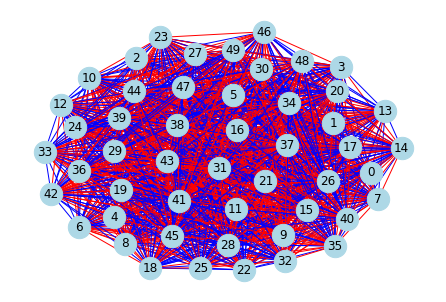

In [3]:
nx.set_edge_attributes(G,name='color',values='black')
points = range(0, n)  

k4s = list(combinations(points, 4))
edges = list(combinations(points,2))
w_k = np.full(len(k4s),2**-5)


for i in range(0,len(edges)):#color edges one by one
    Gred=G.copy()
    nx.set_edge_attributes(Gred, {edges[i]: {'color': 'red'}})
    w_k_red =w_k.copy()
    
    Gblue=G.copy()
    nx.set_edge_attributes(Gblue, {edges[i]: {'color': 'blue'}})
    w_k_blue =w_k.copy()
    
    for j in range(0,len(k4s)):
        if set(edges[i]) <= set(k4s[j]):#if edge is in this K_4,change the related w(k)
            w_k_red[j] = w(Gred.subgraph(k4s[j]))
            w_k_blue[j] = w(Gblue.subgraph(k4s[j]))

    if np.sum(w_k_red)<=np.sum(w_k_blue):
        G=Gred.copy()
        w_k =w_k_red.copy()

    else:
        G=Gblue.copy()
        w_k = w_k_blue.copy()

mono_k4s=0

for s in k4s:
    if w(G.subgraph(s))==1:
        mono_k4s=mono_k4s+1
        example=s
        

if mono_k4s <= 2**-5*n*(n-1)*(n-2)*(n-3)/24:   
    print("there is ",mono_k4s,"monochromatic K_4s.The result satisfis proposition")
if  mono_k4s!=0:  
    print("example is",example)

edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw(G, with_labels=True, edge_color=edge_colors, node_color='lightblue', node_size=500)
plt.show()

Remark：
1.This alogthrim gives a certain graph for fixed n.Because every step is one and only.  
2.To find $K_4$ in $K_n$，just confirm 4 vertices.But it's hard to update $w(K)$ if take 4 vertices as 4 indices.This program use natural order such as (0,1,2,3),(0,1,2,4)...(0,1,2,n),(0,1,3,4)......and check if certain edge in some of them one by one.  
3.Ramsay theory says there must be at least one monochromatic $K_4$ in 2-coloring $K_{18}$.R(4,4)=18.  
4.In Python,same object can have different name.Simple exchanging works in C/C++,but '.copy' is necessary in Python like below.

In [4]:
x=np.array([1,2])
y=np.array([2,3])
z=x
y=z
x=y
print(x,y,z)

[1 2] [1 2] [1 2]
